## Import librarys

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

## Data Understanding and preparation

### Data Collection

In [2]:
df_previous = pd.read_csv('../data/air_system_previous_years.csv')

In [3]:
df_previous.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [4]:
df_previous.isnull().sum()

class     0
aa_000    0
ab_000    0
ac_000    0
ad_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 171, dtype: int64

In [5]:
df_previous.isnull().sum().sum()

0

In [6]:
print(df_previous['class'].value_counts())

class
neg    59000
pos     1000
Name: count, dtype: int64


In [7]:
object_columns = [col for col in df_previous.columns if df_previous[col].dtype == 'object']
df_previous[object_columns].nunique()

class         2
ab_000       30
ac_000     2062
ad_000     1887
ae_000      334
          ...  
ee_007    30470
ee_008    24214
ee_009     9725
ef_000       29
eg_000       50
Length: 170, dtype: int64

In [8]:
df_previous['class'].replace('neg', 0, inplace=True)
df_previous['class'].replace('pos', 1, inplace=True)

In [9]:
df_previous.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,0,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,0,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,0,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,0,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [10]:
df_previous.replace('na', pd.NA, inplace=True)

In [11]:
df_previous.isnull().sum()

class         0
aa_000        0
ab_000    46329
ac_000     3335
ad_000    14861
          ...  
ee_007      671
ee_008      671
ee_009      671
ef_000     2724
eg_000     2723
Length: 171, dtype: int64

In [12]:
threshold = 0.4

missing_percentage = df_previous.isnull().mean()

columns_to_drop = missing_percentage[missing_percentage > threshold].index
df_previous.drop(columns=columns_to_drop, inplace=True)

print(f"Dropped columns: {columns_to_drop}")
print(df_previous.info())

Dropped columns: Index(['ab_000', 'bl_000', 'bm_000', 'bn_000', 'bo_000', 'bp_000', 'bq_000',
       'br_000', 'cr_000'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 162 entries, class to eg_000
dtypes: int64(2), object(160)
memory usage: 74.2+ MB
None


In [13]:
df_previous.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 162 entries, class to eg_000
dtypes: int64(2), object(160)
memory usage: 74.2+ MB


In [14]:
numerical_cols = df_previous.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df_previous.select_dtypes(include=['object']).columns

for col in categorical_cols:
    df_previous[col] = pd.to_numeric(df_previous[col], errors='ignore')

print(df_previous.dtypes)

class       int64
aa_000      int64
ac_000    float64
ad_000    float64
ae_000    float64
           ...   
ee_007    float64
ee_008    float64
ee_009    float64
ef_000    float64
eg_000    float64
Length: 162, dtype: object


In [15]:
df_previous.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 162 entries, class to eg_000
dtypes: float64(160), int64(2)
memory usage: 74.2 MB


In [16]:
df_previous.head()

,class,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,0,33058,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,0,41040,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,0,12,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,0,60874,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [17]:
df_previous['class'].value_counts()

class
0    59000
1     1000
Name: count, dtype: int64

In [18]:
numerical_cols = df_previous.select_dtypes(include=['float64', 'int64']).columns
numerical_cols = numerical_cols.drop('class')

imputer_num = SimpleImputer(strategy='median')
df_previous[numerical_cols] = imputer_num.fit_transform(df_previous[numerical_cols])

print(df_previous.isnull().sum())

print(df_previous.dtypes)

class     0
aa_000    0
ac_000    0
ad_000    0
ae_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 162, dtype: int64
class       int64
aa_000    float64
ac_000    float64
ad_000    float64
ae_000    float64
           ...   
ee_007    float64
ee_008    float64
ee_009    float64
ef_000    float64
eg_000    float64
Length: 162, dtype: object


In [19]:
df_previous.isnull().sum()

class     0
aa_000    0
ac_000    0
ad_000    0
ae_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 162, dtype: int64

In [20]:
df_previous.duplicated().sum()

1

In [21]:
df_previous.drop_duplicates(inplace=True)
df_previous.duplicated().sum()

0

In [22]:
df_previous.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59999 entries, 0 to 59999
Columns: 162 entries, class to eg_000
dtypes: float64(161), int64(1)
memory usage: 74.6 MB


In [23]:
df_num = df_previous.drop(columns=['class'])
df_num = df_num.select_dtypes(include=['float64', 'int64'])
df_num.head() 

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698.0,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,37250.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058.0,0.000000e+00,126.0,0.0,0.0,0.0,0.0,0.0,0.0,18254.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040.0,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,1648.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,12.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,318.0,2212.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,60874.0,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,43752.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


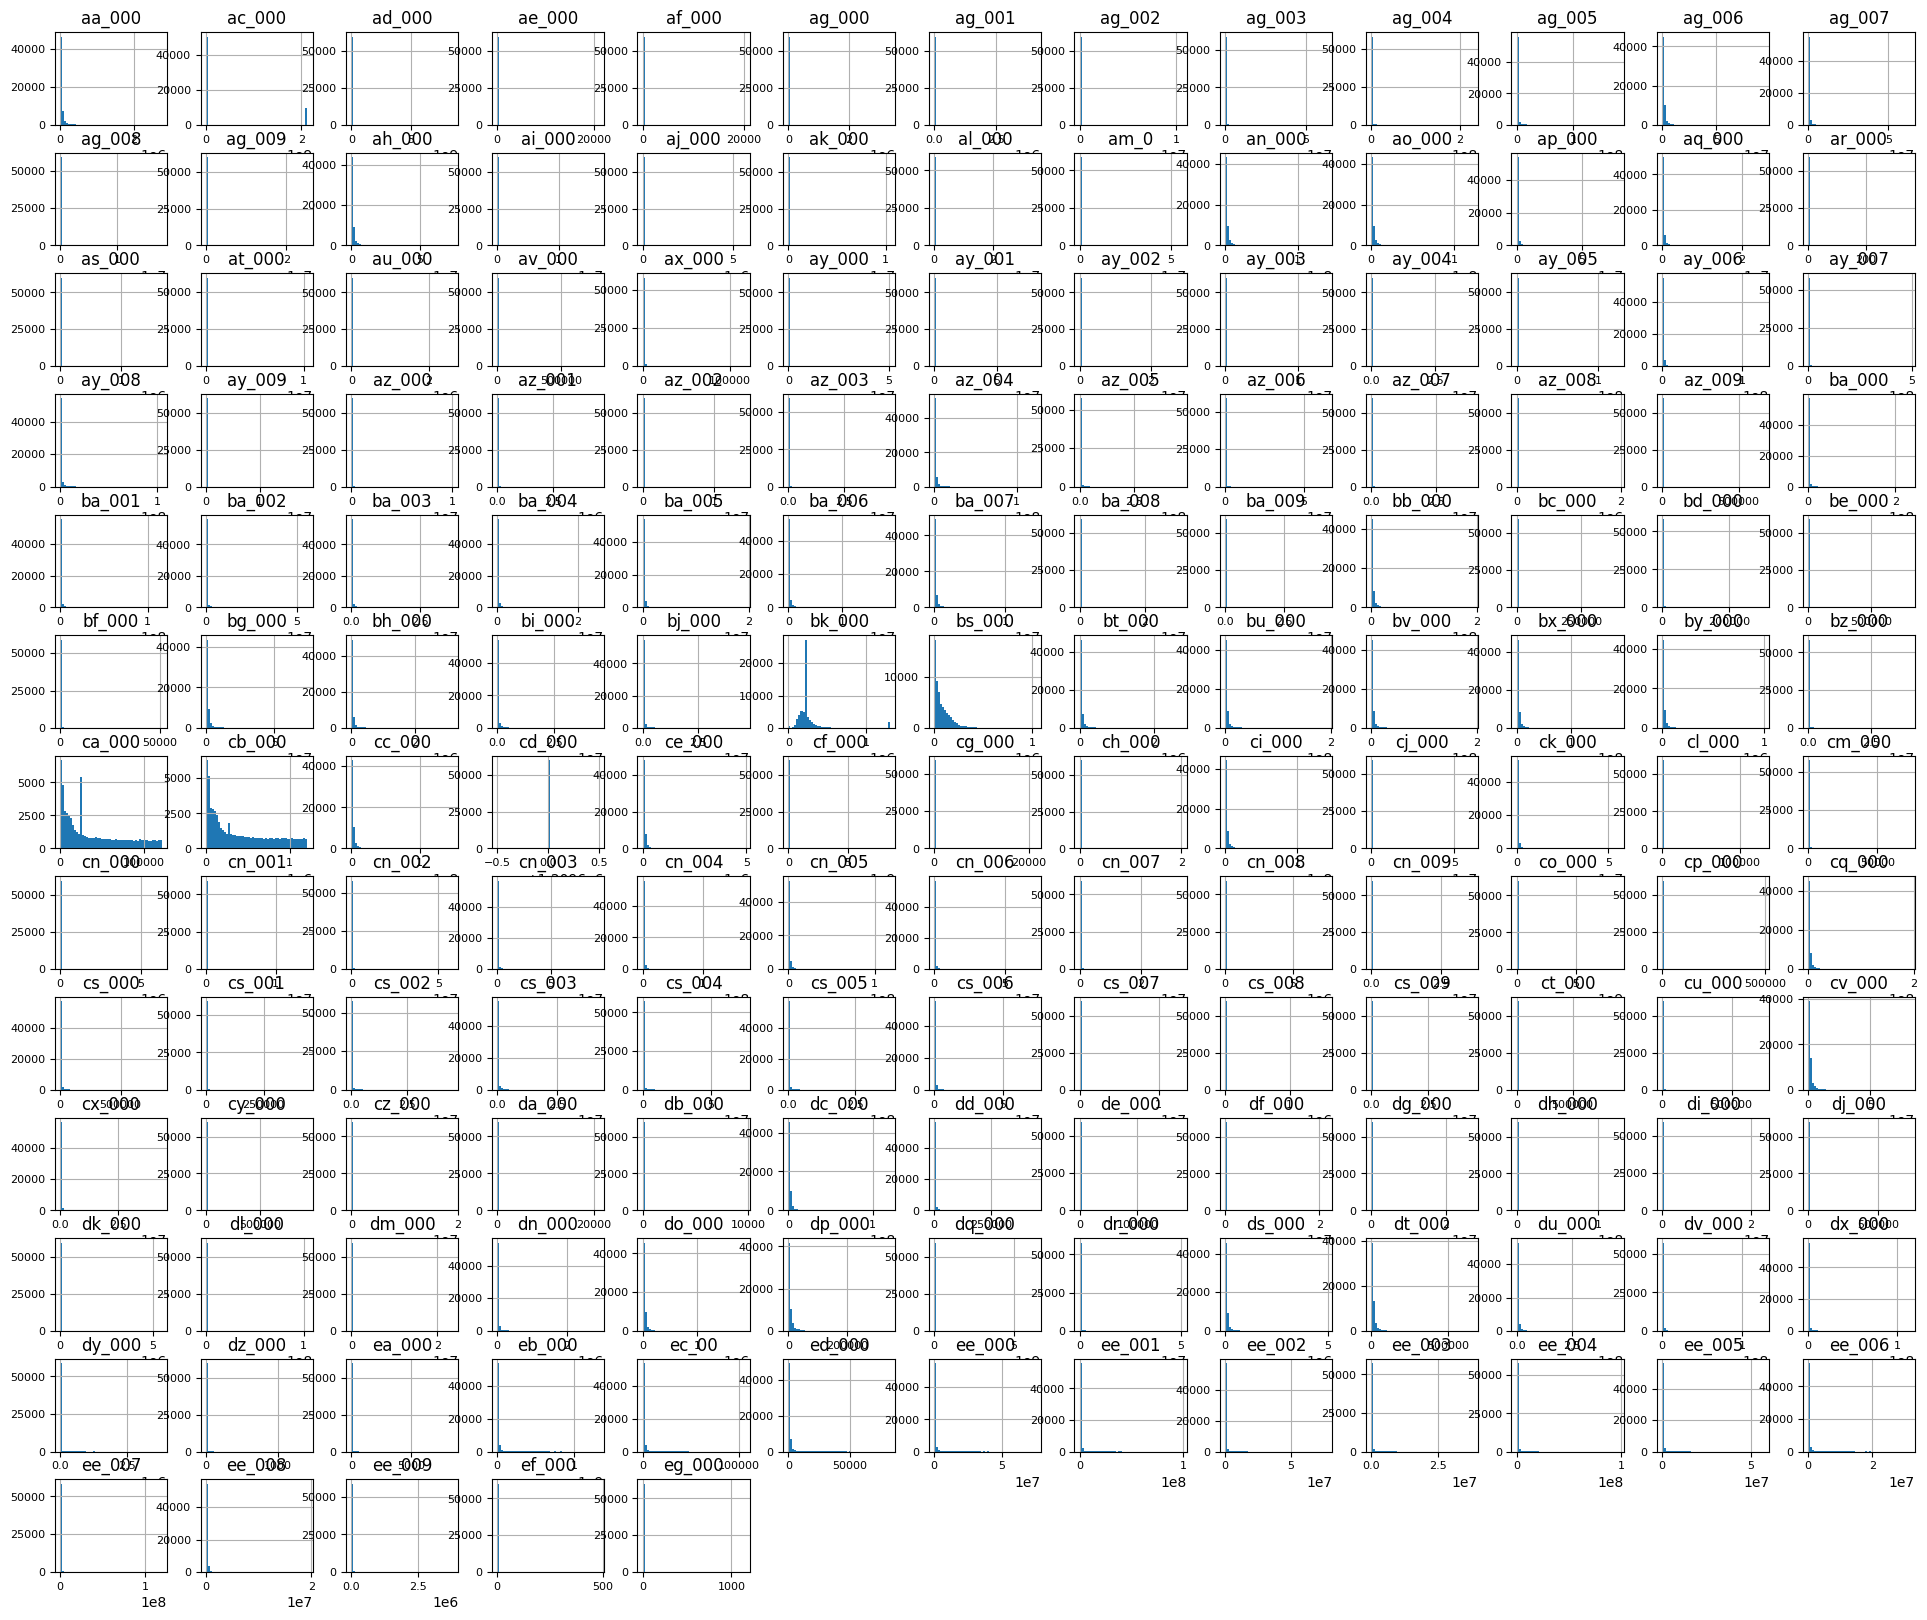

In [24]:
df_num.hist(figsize=(24, 20), bins=50, xlabelsize=8, ylabelsize=8);

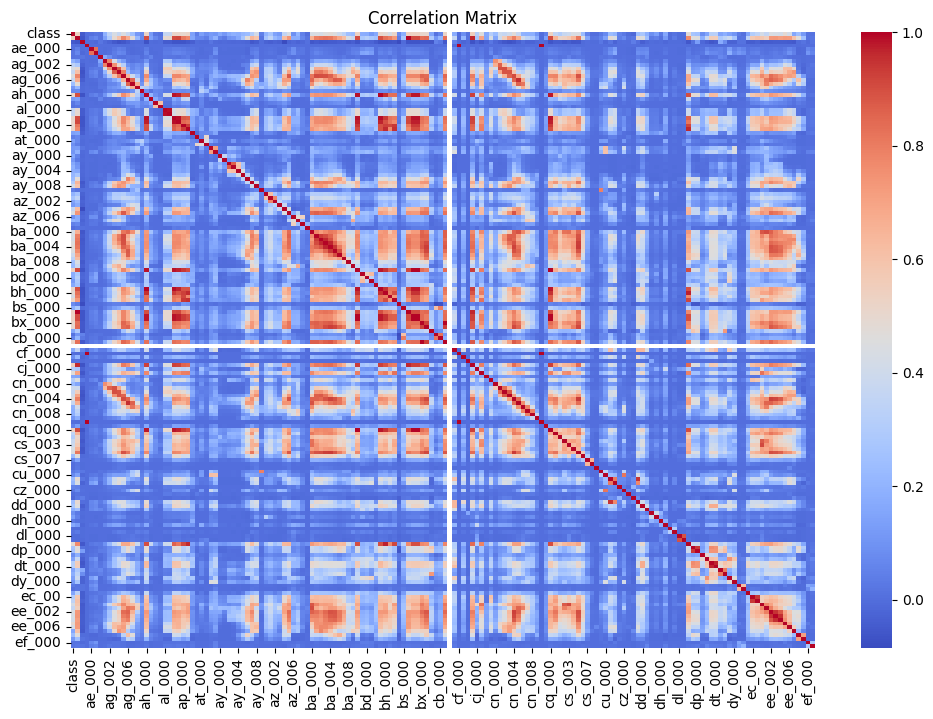

In [25]:
# Correlation matrix
plt.figure(figsize=(12, 8))
corr_matrix = df_previous.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [26]:
X = df_previous.drop(columns=['class'])
y = df_previous['class'] 

model = RandomForestClassifier()
model.fit(X, y)

importances = model.feature_importances_
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})
feature_importances = feature_importances.sort_values('importance', ascending=False)
print(feature_importances.head(20))

    feature  importance
86   ci_000    0.046847
88   ck_000    0.035309
7    ag_002    0.032025
24   aq_000    0.031127
69   bj_000    0.030331
6    ag_001    0.024948
73   bu_000    0.024852
19   al_000    0.024656
20     am_0    0.022188
8    ag_003    0.020034
154  ee_005    0.019952
0    aa_000    0.019512
103  cq_000    0.017767
133  dn_000    0.016992
91   cn_000    0.016939
61   bb_000    0.016867
92   cn_001    0.015858
74   bv_000    0.015154
36   ay_005    0.013982
23   ap_000    0.012376


## Heat map with the most important features

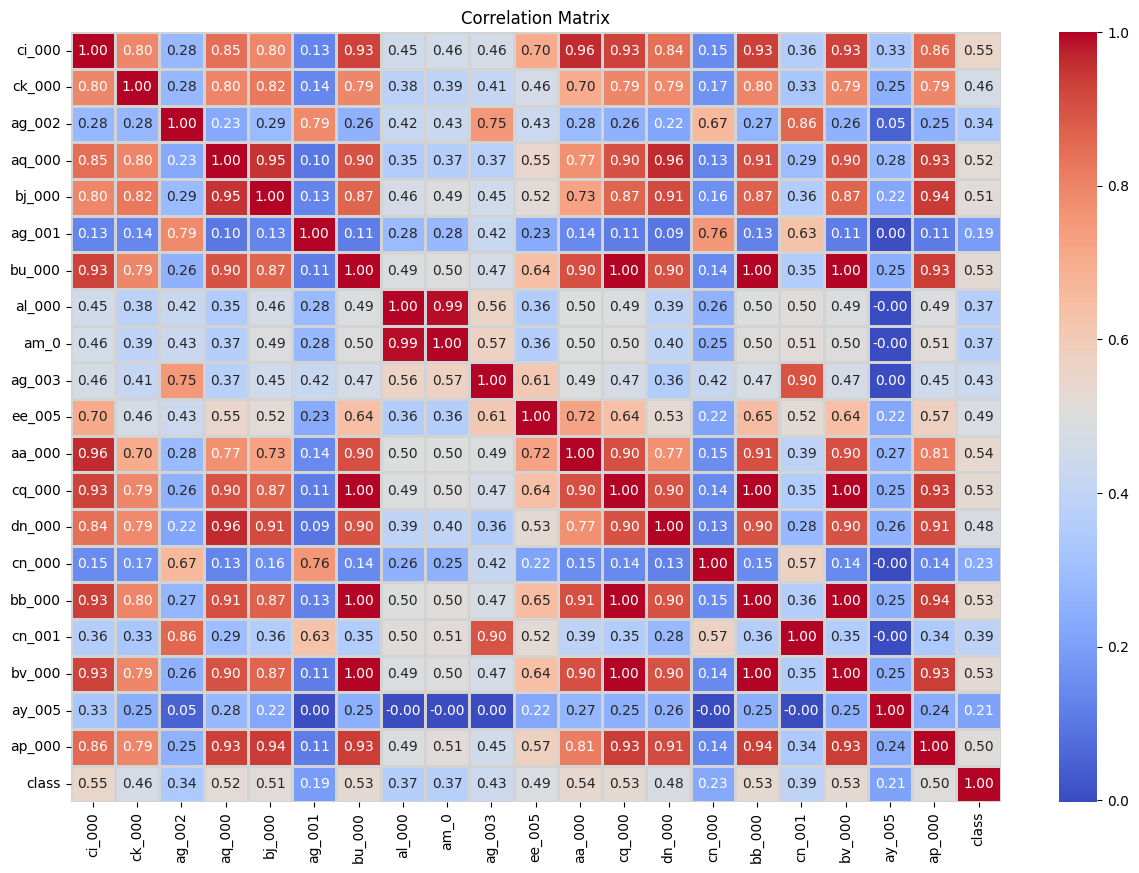

In [27]:
# Correlation matrix
top_features = feature_importances['feature'].head(20).tolist()
top_features.append('class')
corr_matrix_top = df_previous[top_features].corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix_top, annot=True, cmap="coolwarm", fmt=".2f", linewidths=1, linecolor="lightgrey")
plt.title('Correlation Matrix')
plt.show()

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     14732
           1       0.87      0.67      0.76       268

    accuracy                           0.99     15000
   macro avg       0.93      0.83      0.88     15000
weighted avg       0.99      0.99      0.99     15000

Accuracy: 0.9923333333333333


### Trying differents approach to increase recall

In [29]:
model = RandomForestClassifier(n_estimators=100, class_weight={0: 1, 1: 10}, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     14732
           1       0.91      0.61      0.73       268

    accuracy                           0.99     15000
   macro avg       0.95      0.80      0.86     15000
weighted avg       0.99      0.99      0.99     15000

Accuracy: 0.9918666666666667


In [30]:
y_prob = model.predict_proba(X_test)[:, 1]

threshold = 0.3
y_pred_threshold = (y_prob >= threshold).astype(int)

print(classification_report(y_test, y_pred_threshold))
print(f"Accuracy: {accuracy_score(y_test, y_pred_threshold)}")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14732
           1       0.77      0.77      0.77       268

    accuracy                           0.99     15000
   macro avg       0.88      0.88      0.88     15000
weighted avg       0.99      0.99      0.99     15000

Accuracy: 0.9918


In [31]:
df_present = pd.read_csv('../data/air_system_present_year.csv')
df_present.replace('na', pd.NA, inplace=True)

for col in df_present.columns:
    df_present[col] = pd.to_numeric(df_present[col], errors='ignore')

df_present['class'].replace('neg', 0, inplace=True)
df_present['class'].replace('pos', 1, inplace=True)

# Drop columns with more than 40% missing values
columns_to_drop = ['ab_000', 'bl_000', 'bm_000', 'bn_000', 'bo_000', 'bp_000', 'bq_000','br_000', 'cr_000']

df_present.drop(columns=columns_to_drop, inplace=True)
df_present[numerical_cols] = imputer_num.transform(df_present[numerical_cols])

X_present = df_present.drop(columns=['class'])
y_present = df_present['class']

y_present_pred = model.predict(X_present)
print(classification_report(y_present, y_present_pred))
print(f"Accuracy: {accuracy_score(y_present, y_present_pred)}")


              precision    recall  f1-score   support

           0       0.99      1.00      0.99     15625
           1       0.93      0.60      0.73       375

    accuracy                           0.99     16000
   macro avg       0.96      0.80      0.86     16000
weighted avg       0.99      0.99      0.99     16000

Accuracy: 0.9895625


As showed in the classification report, the recall for the positive class, the class with problems in the air system, had a low value compared with the precision and the negative class, this is due to the problem that the dataset is heavely unbalanced, with a lot more negative examples than positive examples. To solve this problem, we will use a model more suitable for our case.

## Improving the model choice

We will chosse another model to deal with this dataset called XGBoost and with GridSearchCV we will tune the hyperparameters to find the optimal model to our case.

In [32]:
inspection_cost = 10
preventive_cost = 25
corrective_cost = 500

expected_costs = []

In [33]:
df_present["class"].value_counts()

class
0    15625
1      375
Name: count, dtype: int64

In [34]:
df_present[(df_present['class'] == 1)]

,class,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
42,1,1800546.0,152.0,13042.0,0.0,0.0,0.0,280.0,132164.0,7875494.0,...,30997662.0,7611880.0,9706814.0,7087194.0,24679144.0,121822.0,52624.0,0.0,0.0,0.0
100,1,715316.0,152.0,126.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3905674.0,1753622.0,3247762.0,2700712.0,2902338.0,2787064.0,3187202.0,135060.0,0.0,0.0
426,1,1055714.0,152.0,126.0,0.0,0.0,0.0,0.0,0.0,130.0,...,7651830.0,3968726.0,9587618.0,8521170.0,6513690.0,3988408.0,6064958.0,307808.0,0.0,0.0
428,1,27304.0,512.0,486.0,0.0,0.0,0.0,0.0,0.0,576480.0,...,241924.0,99820.0,216566.0,203724.0,226244.0,170430.0,7472.0,0.0,0.0,0.0
434,1,1520540.0,152.0,126.0,0.0,0.0,0.0,0.0,0.0,60.0,...,12830228.0,7287542.0,21196940.0,12907126.0,7005504.0,3584098.0,4639484.0,113974.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15736,1,174400.0,152.0,126.0,0.0,0.0,0.0,30432.0,301722.0,1614422.0,...,1105644.0,520758.0,1176256.0,1385890.0,1601694.0,1923956.0,64186.0,0.0,0.0,0.0
15783,1,527262.0,3982.0,34.0,0.0,0.0,0.0,98.0,72942.0,888868.0,...,416132.0,190852.0,487218.0,736134.0,1490982.0,74140.0,62.0,0.0,6.0,36.0
15799,1,756860.0,0.0,126.0,0.0,0.0,0.0,0.0,0.0,8494.0,...,6855960.0,3362408.0,7018398.0,6221124.0,4553774.0,2362834.0,3218640.0,233972.0,0.0,0.0
15955,1,1302632.0,152.0,126.0,0.0,0.0,0.0,0.0,0.0,300.0,...,9717964.0,4850926.0,9893552.0,8797016.0,8130368.0,5661074.0,9406694.0,496412.0,0.0,0.0


In [35]:
df_present.head()

,class,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,60.0,20.0,12.0,0.0,0.0,0.0,0.0,0.0,2682.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,0,82.0,68.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,0,66002.0,212.0,112.0,0.0,0.0,0.0,0.0,0.0,199486.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,0,59816.0,1010.0,936.0,0.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,0,1814.0,156.0,140.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0


### Testing XGBoost with default parameters to see if it is better than the previous model

In [36]:
from xgboost import XGBClassifier

X_previous = df_previous.drop(columns=['class'])
y_previous = df_previous['class']

X_present = df_present.drop(columns=['class'])
y_present = df_present['class']

X_train, X_valid, y_train, y_valid = train_test_split(X_previous, y_previous, test_size=0.25, stratify=y_previous, random_state=42)

xgb_model = XGBClassifier(random_state=42)

xgb_model.fit(X_train, y_train)

y_present_pred = xgb_model.predict(X_present)

accuracy = accuracy_score(y_present, y_present_pred)
report = classification_report(y_present, y_present_pred, output_dict=True)

precision_pos = report['1']['precision']
recall_pos = report['1']['recall']
f1_score_pos = report['1']['f1-score']

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (Positive): {precision_pos:.4f}")
print(f"Recall (Positive): {recall_pos:.4f}")
print(f"F1-score (Positive): {f1_score_pos:.4f}")

print(classification_report(y_present, y_present_pred))

def calculate_estimated_costs(y_true, y_pred):
    total_cost = 0
    defectless_maintenance_cost = 10
    defective_maintenance_cost = 25
    pos_defective_maintenance_cost = 500

    for true, pred in zip(y_true, y_pred):
        if pred == 1:  
            if true == 1:  
                total_cost += defective_maintenance_cost
            else:  
                total_cost += defectless_maintenance_cost
        else:  
            if true == 1:  
                total_cost += pos_defective_maintenance_cost

    return total_cost

estimated_cost = calculate_estimated_costs(y_present, y_present_pred)
print(f"Custo Estimado Total: ${estimated_cost:.2f}")

Accuracy: 0.9934
Precision (Positive): 0.9441
Recall (Positive): 0.7653
F1-score (Positive): 0.8454
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     15625
           1       0.94      0.77      0.85       375

    accuracy                           0.99     16000
   macro avg       0.97      0.88      0.92     16000
weighted avg       0.99      0.99      0.99     16000

Custo Estimado Total: $51345.00


In [37]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [500, 800, 1000],
    'learning_rate': [0.01, 0.05],
    'max_depth': [3, 5, 7],
}

grid_search = GridSearchCV(XGBClassifier(), param_grid, scoring='neg_mean_squared_error')

grid_search.fit(X_previous, y_previous)

best_params = grid_search.best_params_

xgb_model_final = XGBClassifier(**best_params)

xgb_model_final.fit(X_previous, y_previous)

y_present_pred = xgb_model_final.predict(X_present)

estimated_cost = calculate_estimated_costs(y_present, y_present_pred)

print(f"Best Hyperparameters: {best_params}")
print(f"Total estimated cost (df_present): ${estimated_cost:.2f}")

Best Hyperparameters: {'gamma': 0.1, 'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 500}
Total estimated cost (df_present): $44675.00


### Running XGBoost with the best hyperparameters found with GridSearch

In [39]:
xgb_best_parametes = XGBClassifier(n_estimators=1000, learning_rate=0.05, max_depth=7, random_state=42)
xgb_best_parametes.fit(X_previous, y_previous)
y_present_pred = xgb_best_parametes.predict(X_present)
estimated_cost = calculate_estimated_costs(y_present, y_present_pred)
print(f"Total estimated cost (df_present): ${estimated_cost:.2f}")
print(classification_report(y_present, y_present_pred))

Total estimated cost (df_present): $44665.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15625
           1       0.96      0.80      0.87       375

    accuracy                           0.99     16000
   macro avg       0.98      0.90      0.93     16000
weighted avg       0.99      0.99      0.99     16000



In [40]:
baseline_cost = len(df_present[df_present['class'] == 1]) * corrective_cost 

cost_reduction = baseline_cost - estimated_cost
print(f"Estimated Cost: ${estimated_cost}")
print(f"Baseline Cost: ${baseline_cost}")
print(f"Cost Reduction: ${cost_reduction:.2f}")

Estimated Cost: $44665
Baseline Cost: $187500
Cost Reduction: $142835.00


# Conclusion

Based on our analysis, we successfully implemented a predictive model using XGBoost to identify trucks with potential defects in their air systems. By deploying this model, we aimed to minimize the overall maintenance costs for the company. 
The results demonstrate a significant cost reduction compared to the baseline.
Note that for the estimation in the baseline cost reduction and in our model cost reduction we that all trucks with a problem with air system will be charged with the corrective cost, which:

    Baseline Cost if all the trucks with air system defect were charged : $187,500
    New estimated cost wit model prediction: $44,665.
The model was able to reduce the cost by 87% compared to the baseline. Equivalent to a cost reduction of $142,835.

This substantial reduction in costs highlights the effectiveness of our predictive maintenance approach. Our model not only identifies trucks that require maintenance but also helps avoid unnecessary inspections, thereby optimizing resource allocation and reducing downtime.

### Baseline Cost Estimation

In the baseline scenario, we assume that all trucks with a problem in the air system, in total 375, will incur the corrective maintenance cost. This cost is the case where a truck is not sent for maintenance and has a defect that requires corrective action.

### Predictive Maintenance Cost Estimation

For the predictive maintenance scenario, our model optimizes the decision-making process by identifying trucks that need maintenance and avoiding unnecessary maintenance checks. The cost estimation for this scenario takes into account the accuracy of our model in predicting the defects and the associated costs of correct and incorrect predictions.

## Data and Assumptions

### Cost Comparison: Baseline vs. Predictive Maintenance

To visualize the impact of our model, we present the following graphs:

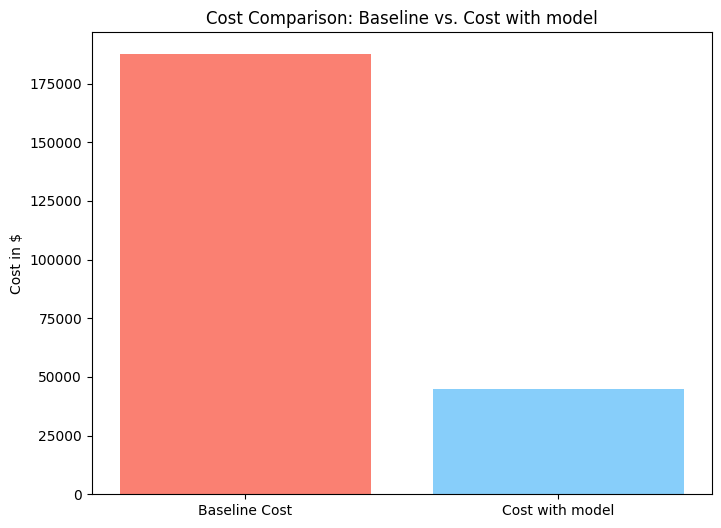

In [47]:
costs = [baseline_cost, estimated_cost]
labels = ['Baseline Cost', 'Cost with model']

plt.figure(figsize=(8, 6))
plt.bar(labels, costs, color=['salmon', 'lightskyblue'])
plt.ylabel('Cost in $')
plt.title('Cost Comparison: Baseline vs. Cost with model')
plt.show()